In [1]:
import pandas as pd
import json
import timeit
import seaborn as sns

In [2]:
%store -r total_res

## Dataframe con todos los resultados

In [4]:
def res_to_pandas(total_res):
    """
    Transform nested dictionary from multiple 
    sequence search into a dataframe
    :param dict total_res: nested dictionary from multiple sequence search
    :return res_pd: Pandas dataframe with all the results
    """
    
    #Getting a DataFrame containing all values from the nested dict
    from itertools import chain
    values=list(total_res.values())
    list_values=list(chain.from_iterable(values))
    values_df=pd.DataFrame(list_values)
    values_df=values_df.drop(columns=['chain_id','entity_id','entry_entity','result_sequence'])
    
    #Now create a dataframe with all query sequences respecting indexes
    key_list = [[k,v] for k, values in total_res.items() for v in values]
    df_list=pd.DataFrame(key_list)
    df_list.drop(1, axis=1,inplace=True) #Dropping values (list of dicts)
    df_list.rename(columns={0:'query_sequences'},inplace=True)
    
    #Concatenating both DataFrames
    res_df=pd.concat([df_list,values_df],axis=1)
    
    return res_df

In [5]:
res_df=res_to_pandas(total_res)

In [6]:
res_df

,query_sequences,molecule_name,pdb_id,e_value,percentage_identity
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,[Lasiocepsin],2mbd,1.100000e-13,100.0
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,[Fungal defensin eurocin],2lt8,5.700000e-22,100.0
2,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,[Defensin MGD-1],1fjn,3.900000e-06,52.5
3,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,[micasin],2lr5,6.500000e-05,50.0
4,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,[INVERT_DEFENSINS domain-containing protein],2ru0,1.600000e-04,47.5
...,...,...,...,...,...
10013,TFFRLFNR,[Competence stimulating protein],2i2j,5.500000e-02,100.0
10014,RRSVQWCA,[Lactoferricin-H],1z6w,2.800000e-02,100.0
10015,RRSVQWCA,[Lactoferricin-H],1z6v,2.800000e-02,100.0
10016,FKCRRWQWR,[Lactoferricin-B],1lfc,1.200000e-04,100.0


In [4]:
%store -r total_res

## PDB sequence

In [ ]:
import re
import requests

base_url = "https://www.ebi.ac.uk/pdbe/"

api_base = base_url + "api/"

molecules_url = api_base + '/pdb/entry/molecules/'

In [6]:
def make_request(url, mode, pdb_id):
    """
    This function can make GET and POST requests to
    the PDBe API
    
    :param url: String,
    :param mode: String,
    :param pdb_id: String
    :return: JSON or None
    """
    if mode == "get":
        response = requests.get(url=url+pdb_id)
    elif mode == "post":
        response = requests.post(url, data=pdb_id)

    if response.status_code == 200:
        return response.json()
    else:
        print("[No data retrieved - %s] %s" % (response.status_code, response.text))
    
    return None

In [7]:
def get_pdb_sequence(pdb_id_list):
    """
    Get sequences associated with pdb ids
    """
    start = timeit.default_timer()
    res=[]
    i=0
    while i < len(pdb_id_list):
            data=make_request(molecules_url,'get',pdb_id_list[i])
            sequence=data.get(pdb_id_list[i])[0].get('sequence')
            res.append(sequence)
            i=i+1
            print(str(i)+" sequences of "+str(len(pdb_id_list)))
    
    else:
            stop = timeit.default_timer()
            temp = stop-start
            print("Done!")
            hours = temp//3600
            temp = temp - 3600*hours
            minutes = temp//60
            seconds = temp - 60*minutes
            print("Run time: " + '%d:%d:%d' %(hours,minutes,seconds)) 
            
            
    return res

In [84]:
pdbid_list=pd.Series.tolist(res_df['pdb_id'])

In [153]:
list_1k=pdbid_list[0:1000]

In [154]:
run_1k=get_pdb_sequence(list_1k)

1 sequences of 1000
2 sequences of 1000
3 sequences of 1000
4 sequences of 1000
5 sequences of 1000
6 sequences of 1000
7 sequences of 1000
8 sequences of 1000
9 sequences of 1000
10 sequences of 1000
11 sequences of 1000
12 sequences of 1000
13 sequences of 1000
14 sequences of 1000
15 sequences of 1000
16 sequences of 1000
17 sequences of 1000
18 sequences of 1000
19 sequences of 1000
20 sequences of 1000
21 sequences of 1000
22 sequences of 1000
23 sequences of 1000
24 sequences of 1000
25 sequences of 1000
26 sequences of 1000
27 sequences of 1000
28 sequences of 1000
29 sequences of 1000
30 sequences of 1000
31 sequences of 1000
32 sequences of 1000
33 sequences of 1000
34 sequences of 1000
35 sequences of 1000
36 sequences of 1000
37 sequences of 1000
38 sequences of 1000
39 sequences of 1000
40 sequences of 1000
41 sequences of 1000
42 sequences of 1000
43 sequences of 1000
44 sequences of 1000
45 sequences of 1000
46 sequences of 1000
47 sequences of 1000
48 sequences of 1000
4

379 sequences of 1000
380 sequences of 1000
381 sequences of 1000
382 sequences of 1000
383 sequences of 1000
384 sequences of 1000
385 sequences of 1000
386 sequences of 1000
387 sequences of 1000
388 sequences of 1000
389 sequences of 1000
390 sequences of 1000
391 sequences of 1000
392 sequences of 1000
393 sequences of 1000
394 sequences of 1000
395 sequences of 1000
396 sequences of 1000
397 sequences of 1000
398 sequences of 1000
399 sequences of 1000
400 sequences of 1000
401 sequences of 1000
402 sequences of 1000
403 sequences of 1000
404 sequences of 1000
405 sequences of 1000
406 sequences of 1000
407 sequences of 1000
408 sequences of 1000
409 sequences of 1000
410 sequences of 1000
411 sequences of 1000
412 sequences of 1000
413 sequences of 1000
414 sequences of 1000
415 sequences of 1000
416 sequences of 1000
417 sequences of 1000
418 sequences of 1000
419 sequences of 1000
420 sequences of 1000
421 sequences of 1000
422 sequences of 1000
423 sequences of 1000
424 sequen

752 sequences of 1000
753 sequences of 1000
754 sequences of 1000
755 sequences of 1000
756 sequences of 1000
757 sequences of 1000
758 sequences of 1000
759 sequences of 1000
760 sequences of 1000
761 sequences of 1000
762 sequences of 1000
763 sequences of 1000
764 sequences of 1000
765 sequences of 1000
766 sequences of 1000
767 sequences of 1000
768 sequences of 1000
769 sequences of 1000
770 sequences of 1000
771 sequences of 1000
772 sequences of 1000
773 sequences of 1000
774 sequences of 1000
775 sequences of 1000
776 sequences of 1000
777 sequences of 1000
778 sequences of 1000
779 sequences of 1000
780 sequences of 1000
781 sequences of 1000
782 sequences of 1000
783 sequences of 1000
784 sequences of 1000
785 sequences of 1000
786 sequences of 1000
787 sequences of 1000
788 sequences of 1000
789 sequences of 1000
790 sequences of 1000
791 sequences of 1000
792 sequences of 1000
793 sequences of 1000
794 sequences of 1000
795 sequences of 1000
796 sequences of 1000
797 sequen

In [157]:
%store run_1k 

Stored 'run_1k' (list)


In [11]:
list_2k=pdbid_list[1000:2000]

In [12]:
run_2k=get_pdb_sequence(list_2k)

00
92 sequences of 1000
93 sequences of 1000
94 sequences of 1000
95 sequences of 1000
96 sequences of 1000
97 sequences of 1000
98 sequences of 1000
99 sequences of 1000
100 sequences of 1000
101 sequences of 1000
102 sequences of 1000
103 sequences of 1000
104 sequences of 1000
105 sequences of 1000
106 sequences of 1000
107 sequences of 1000
108 sequences of 1000
109 sequences of 1000
110 sequences of 1000
111 sequences of 1000
112 sequences of 1000
113 sequences of 1000
114 sequences of 1000
115 sequences of 1000
116 sequences of 1000
117 sequences of 1000
118 sequences of 1000
119 sequences of 1000
120 sequences of 1000
121 sequences of 1000
122 sequences of 1000
123 sequences of 1000
124 sequences of 1000
125 sequences of 1000
126 sequences of 1000
127 sequences of 1000
128 sequences of 1000
129 sequences of 1000
130 sequences of 1000
131 sequences of 1000
132 sequences of 1000
133 sequences of 1000
134 sequences of 1000
135 sequences of 1000
136 sequences of 1000
137 sequences o

In [15]:
%store run_2k

Stored 'run_2k' (list)


In [17]:
list_3k=pdbid_list[2000:3000]

In [19]:
run_3k=get_pdb_sequence(list_3k)

quences of 1000
94 sequences of 1000
95 sequences of 1000
96 sequences of 1000
97 sequences of 1000
98 sequences of 1000
99 sequences of 1000
100 sequences of 1000
101 sequences of 1000
102 sequences of 1000
103 sequences of 1000
104 sequences of 1000
105 sequences of 1000
106 sequences of 1000
107 sequences of 1000
108 sequences of 1000
109 sequences of 1000
110 sequences of 1000
111 sequences of 1000
112 sequences of 1000
113 sequences of 1000
114 sequences of 1000
115 sequences of 1000
116 sequences of 1000
117 sequences of 1000
118 sequences of 1000
119 sequences of 1000
120 sequences of 1000
121 sequences of 1000
122 sequences of 1000
123 sequences of 1000
124 sequences of 1000
125 sequences of 1000
126 sequences of 1000
127 sequences of 1000
128 sequences of 1000
129 sequences of 1000
130 sequences of 1000
131 sequences of 1000
132 sequences of 1000
133 sequences of 1000
134 sequences of 1000
135 sequences of 1000
136 sequences of 1000
137 sequences of 1000
138 sequences of 1000


In [48]:
list_5k=pdbid_list[3000:5000]

In [21]:
run_5k=get_pdb_sequence(list_5k)

1133 sequences of 2000
1134 sequences of 2000
1135 sequences of 2000
1136 sequences of 2000
1137 sequences of 2000
1138 sequences of 2000
1139 sequences of 2000
1140 sequences of 2000
1141 sequences of 2000
1142 sequences of 2000
1143 sequences of 2000
1144 sequences of 2000
1145 sequences of 2000
1146 sequences of 2000
1147 sequences of 2000
1148 sequences of 2000
1149 sequences of 2000
1150 sequences of 2000
1151 sequences of 2000
1152 sequences of 2000
1153 sequences of 2000
1154 sequences of 2000
1155 sequences of 2000
1156 sequences of 2000
1157 sequences of 2000
1158 sequences of 2000
1159 sequences of 2000
1160 sequences of 2000
1161 sequences of 2000
1162 sequences of 2000
1163 sequences of 2000
1164 sequences of 2000
1165 sequences of 2000
1166 sequences of 2000
1167 sequences of 2000
1168 sequences of 2000
1169 sequences of 2000
1170 sequences of 2000
1171 sequences of 2000
1172 sequences of 2000
1173 sequences of 2000
1174 sequences of 2000
1175 sequences of 2000
1176 sequen

In [49]:
%store run_5k run_3k

Stored 'run_5k' (list)
Stored 'run_3k' (list)


In [50]:
list_6k=pdbid_list[5000:6000]

In [51]:
run_6k=get_pdb_sequence(list_6k)

 1000
93 sequences of 1000
94 sequences of 1000
95 sequences of 1000
96 sequences of 1000
97 sequences of 1000
98 sequences of 1000
99 sequences of 1000
100 sequences of 1000
101 sequences of 1000
102 sequences of 1000
103 sequences of 1000
104 sequences of 1000
105 sequences of 1000
106 sequences of 1000
107 sequences of 1000
108 sequences of 1000
109 sequences of 1000
110 sequences of 1000
111 sequences of 1000
112 sequences of 1000
113 sequences of 1000
114 sequences of 1000
115 sequences of 1000
116 sequences of 1000
117 sequences of 1000
118 sequences of 1000
119 sequences of 1000
120 sequences of 1000
121 sequences of 1000
122 sequences of 1000
123 sequences of 1000
124 sequences of 1000
125 sequences of 1000
126 sequences of 1000
127 sequences of 1000
128 sequences of 1000
129 sequences of 1000
130 sequences of 1000
131 sequences of 1000
132 sequences of 1000
133 sequences of 1000
134 sequences of 1000
135 sequences of 1000
136 sequences of 1000
137 sequences of 1000
138 sequenc

In [52]:
%store run_6k

Stored 'run_6k' (list)


In [38]:
final_list=pdbid_list[6000:]

In [41]:
final_run=get_pdb_sequence(final_list)

ces of 4018
3151 sequences of 4018
3152 sequences of 4018
3153 sequences of 4018
3154 sequences of 4018
3155 sequences of 4018
3156 sequences of 4018
3157 sequences of 4018
3158 sequences of 4018
3159 sequences of 4018
3160 sequences of 4018
3161 sequences of 4018
3162 sequences of 4018
3163 sequences of 4018
3164 sequences of 4018
3165 sequences of 4018
3166 sequences of 4018
3167 sequences of 4018
3168 sequences of 4018
3169 sequences of 4018
3170 sequences of 4018
3171 sequences of 4018
3172 sequences of 4018
3173 sequences of 4018
3174 sequences of 4018
3175 sequences of 4018
3176 sequences of 4018
3177 sequences of 4018
3178 sequences of 4018
3179 sequences of 4018
3180 sequences of 4018
3181 sequences of 4018
3182 sequences of 4018
3183 sequences of 4018
3184 sequences of 4018
3185 sequences of 4018
3186 sequences of 4018
3187 sequences of 4018
3188 sequences of 4018
3189 sequences of 4018
3190 sequences of 4018
3191 sequences of 4018
3192 sequences of 4018
3193 sequences of 4018

In [46]:
%store final_run

Stored 'final_run' (list)


In [53]:
pdb_sequences=run_1k+run_2k+run_3k+run_5k+run_6k+final_run

In [55]:
res_df['pdb_sequence']=pdb_sequences

In [7]:
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor

In [ ]:
#Creamos una lista con las secuencias del DF para poder trabajarla en modlAMP 
sec_query=pd.Series.tolist(res_df["query_sequences"])
#Calcular la longitud de las secuencias
globaldesc=GlobalDescriptor(sec_query)
globaldesc.length()
lon=globaldesc.descriptor
res_df["query_sequence_length"]=lon

In [ ]:
#Creamos una lista con las secuencias del DF para poder trabajarla en modlAMP 
sec_pdb=pd.Series.tolist(res_df["pdb_sequence"])
#Calcular la longitud de las secuencias
globaldesc=GlobalDescriptor(sec_pdb)
globaldesc.length()
pdb_lon=globaldesc.descriptor
res_df["pdb_sequence_length"]=pdb_lon

In [ ]:
res_df=res_df[["query_sequences","query_sequence_length","pdb_sequence","pdb_sequence_length","pdb_id","e_value","percentage_identity","molecule_name"]]

In [1]:
%store -r res_df

## Identifying sequence motifs

In [2]:
res_df["length_difference"]=res_df["pdb_sequence_length"]-res_df["query_sequence_length"]

In [3]:
sub_res_df=res_df[res_df["pdb_sequence_length"]<200]

In [4]:
sub_res_df.describe()

,query_sequence_length,pdb_sequence_length,e_value,percentage_identity,length_difference
count,9258.000000,9258.000000,9.258000e+03,9258.000000,9258.000000
mean,32.099266,44.163210,5.695594e-03,73.566127,12.063945
std,16.184304,33.789565,1.629062e-02,20.880064,32.180563
min,8.000000,15.000000,1.300000e-69,20.200000,-84.000000
25%,22.000000,24.000000,2.800000e-10,55.100000,0.000000
50%,28.000000,33.000000,1.600000e-06,75.000000,1.000000
75%,40.000000,44.000000,1.000000e-03,93.875000,6.000000
max,140.000000,199.000000,9.900000e-02,100.000000,183.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

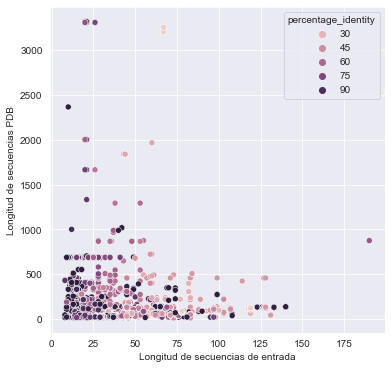

In [10]:
fig=plt.gcf()
fig.set_size_inches(6,6)
sns.scatterplot(data=res_df, x="query_sequence_length", y="pdb_sequence_length", hue="percentage_identity")
plt.xlabel("Longitud de secuencias de entrada")
plt.ylabel("Longitud de secuencias PDB")
plt.title("Comparación longitud de secuencias consenso vs PDB")
sns.set_style("darkgrid")
plt.show()

In [67]:
sub_res_5=res_df[(res_df["length_difference"]>=-5) & (res_df["length_difference"]<=5)]

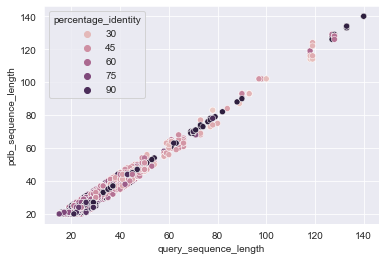

In [62]:
sns.scatterplot(data=sub_res_5, x="query_sequence_length", y="pdb_sequence_length", hue="percentage_identity")
plt.xlabel("Longitud de secuencias de entrada")
plt.ylabel("Longitud de secuencias PDB")

plt.title("")

In [81]:
%store sub_res_5

Stored 'sub_res_5' (DataFrame)


## Equal length

In [9]:
equal_length=res_df[res_df["query_sequence_length"]==res_df["pdb_sequence_length"]]

In [6]:
%store equal_length

Stored 'equal_length' (DataFrame)


In [61]:
equal_length.describe()

,query_sequence_length,pdb_sequence_length,e_value,percentage_identity
count,2351.000000,2351.000000,2.351000e+03,2351.000000
mean,32.333900,32.333900,2.369902e-03,77.979753
std,15.988731,15.988731,1.099104e-02,18.303080
min,20.000000,20.000000,1.300000e-69,32.400000
25%,23.000000,23.000000,2.200000e-13,62.500000
50%,25.000000,25.000000,1.000000e-09,82.600000
75%,38.000000,38.000000,2.300000e-06,95.200000
max,140.000000,140.000000,9.300000e-02,100.000000


In [37]:
equal_length

,query_sequences,query_sequence_length,pdb_sequence,pdb_sequence_length,pdb_id,e_value,percentage_identity,molecule_name
0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,GLPRKILCAIAKKKGKCKGPLKLVCKC,27.0,2mbd,1.100000e-13,100.0,[Lasiocepsin]
1,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,42.0,2lt8,5.700000e-22,100.0,[Fungal defensin eurocin]
11,FLPAIAGMAAKFLPKIFCAISKKC,24.0,FLPILASLAAKFGPKLFCLVTKKC,24.0,6g4i,6.700000e-07,62.5,[Brevinin-1BYa]
12,FLPAIAGMAAKFLPKIFCAISKKC,24.0,FLPILASLAAKFGPKLFCLVTKKC,24.0,6g4k,6.700000e-07,62.5,[Brevinin-1BYa]
13,FLPAIAGMAAKFLPKIFCAISKKC,24.0,FLPILASLAAKFGPKLFCLVTKKC,24.0,6g4u,6.700000e-07,62.5,[Brevinin-1BYa]
...,...,...,...,...,...,...,...,...
9957,RCICTTRTCRFPYRRLGTCLFQNRVYTFCC,30.0,DCYCRIPACIAGERRYGTCIYQGRLWAFCC,30.0,1dfn,3.600000e-05,44.8,[Neutrophil defensin 3]
9959,RCICTTRTCRFPYRRLGTCLFQNRVYTFCC,30.0,ACYCRIPACIAGERRAGTCIYQGRLWAFCC,30.0,3lo1,4.500000e-05,44.8,[Neutrophil defensin 1]
9960,RCICTTRTCRFPYRRLGTCLFQNRVYTFCC,30.0,ACYCRIPACIAGERRYGTCIYQGRLAAFCC,30.0,3lo9,9.200000e-05,44.8,[Neutrophil defensin 1]
9961,RCICTTRTCRFPYRRLGTCLFQNRVYTFCC,30.0,ACYCRIPACIAGERRYGTCIYQGRLAAFCC,30.0,3lo6,9.200000e-05,44.8,[Neutrophil defensin 1]


In [38]:
sec_raw=pd.Series.tolist(equal_length["query_sequences"])
sec=[]
[sec.append(x) for x in sec_raw if x not in sec]
len(sec)

702

## Results vs sequence length

In [27]:
num_results={}
for k,v in total_res.items():
    num_results[k]=len(v)

In [30]:
results_vs_len_df=pd.DataFrame(num_results.items())

In [31]:
results_vs_len_df.rename(columns={0:"sequence",1:"num_of_results"},inplace=True)

In [32]:
#Creamos una lista con las secuencias del DF para poder trabajarla en modlAMP 
sec_lng=pd.Series.tolist(results_vs_len_df["sequence"])
#Calcular la longitud de las secuencias
globaldesc=GlobalDescriptor(sec_lng)
globaldesc.length()
lng=globaldesc.descriptor
results_vs_len_df["sequence_length"]=lng

In [33]:
results_vs_len_df.describe()

,num_of_results,sequence_length
count,2135.000000,2135.000000
mean,4.692272,29.625761
std,3.400950,16.306518
min,1.000000,8.000000
25%,1.000000,20.000000
50%,4.000000,25.000000
75%,8.000000,36.000000
max,10.000000,190.000000


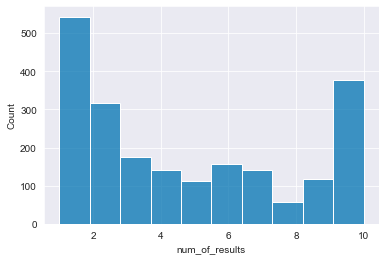

In [78]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette(palette="colorblind")
sns.histplot(data=results_vs_len_df, x="num_of_results", bins=10, cbar=True);

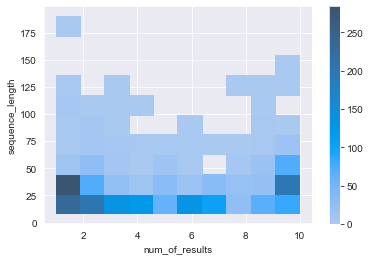

In [79]:
sns.histplot(data=results_vs_len_df, y="sequence_length", x="num_of_results", bins=10, cbar=True);

In [4]:
stride_df=pd.read_csv('./pdb/stride/summary/prueba/stride.tsv', sep='\t', names=['pdb_id','len','sequence','secondary_structure'])

In [5]:
stride_df

,pdb_id,len,sequence,secondary_structure
0,1AML,40,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV,CCTTTTCTTTTTTHHHHHHHHHHTTTTCCCHHHHHHCCCC
1,1AVF,21,AVVKVPLKKFKSIRETMKEKG,CCEEEEEEECCCHHHHHHHHC
2,1BA4,40,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV,CTTTTTTCCTTTCHHHHHHHHHHHHHHHHHHHHHHHCCCC
3,1BA6,39,DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLVGGVV,CCCCCCCTTTTCCCHHHHHHHHHHHHTTTTTTTTCCCCC
4,1BH1,26,GIGAVLKVLTTGLPALISWIKRKRQQ,CTTTTTTTTTTTTTTGGGHHHHHHCC
...,...,...,...,...
429,7KPD,29,AIPCGESCVYIPCISVVIGCSCRNKVCYR,CCEEEEETTTTCTTTGGGCCEEETTEEEC
430,7MN3,24,NLVSDIIGSKKHMEKLISIIKKCR,CHHHHHHHHHHHHHHHHHHHHCCC
431,7NS1,31,MITISTMLQFGLFLIALIGLVIKLIELSNKK,CCCHHHHHHHHHHHHHHHHHHHHHHHHHHCC
432,7NYI,48,AGLLRFLLSKGRALYNWASHVGKVWEWLKSGATYEQIKEWIENALGWR,HHHHHHHHHCCHHHHHHHCCCHHHHHHHHHHCCHHHHHHHHHHHHCCC


In [19]:
jpred_oneid_df=pd.read_csv('./pdb/jpred/one_id.tsv', sep='\t', names=['pdb_id','sequence','secondary_structure', '0'])
jpred_oneid_df.drop(columns=['0'], inplace=True)

In [22]:
jpred_oneid_df

,pdb_id,sequence,secondary_structure
0,6c41,VFQFLGKIIHHVGNFVHGFSHVFGGGGGGG,CHHHHHHHHHHHHHHHHCCCEEECCCCCCC
1,2nz3,ATCDLASIFNVNHALCAAHCIARRYRGGYCNSKAVCVCRN,CCCCCCCCCCCCCCHHHHHHHHHCCCCCCECCCCEEECCC
2,2m8v,ADRGWIKTLTKDCPNVISSICAGTIITACKNCA,CCCCHHHHHHHCHHHHHHHHHHHHHHHHHCCCC
3,2lg5,LFCKGGSCHFGGCPSHLIKVGSCFGFRSCCKWPWNA,CEECCCCEECCCCCCEEEECCCCCCCCCCCCCCCCC
4,2ojo,FFHHIFRAIVHVAKTIHRLVTGGGGGGGGG,CHHHHHHHHHHHHHHHHHHECCCCCCCCCC
...,...,...,...
256,2pv6,ELDKWASLWNWFNITNWLWYIKGGGGGGGG,CCCCHHHHHHHHHHHHHHHHHHHHHHECCC
257,2eri,CGESCVFIPCISTLLGCSCKNKVCYRNGVIP,CCCCEEEEEEHHHHHCCCCCCCCECCCCCCC
258,1pxq,NKGCATCSIGAACLVDGPIPDFEIAGATGLFGLWG,CCCCCEEEECCEEECCCCCCCCCEHHHHHHHHHCC
259,5wow,GGVCPKILQRCRRDSDCPGACICRGNGYCGYPYDVPDYA,CCCHHHHHHHHCCCCCCCCEEEECCCCCCCCCCCCCCCC


In [28]:
jpred_multid=pd.read_csv('./pdb/jpred/mult_id.tsv', sep='\t', names=['pdb_id','sequence','secondary_structure', '0'])
jpred_multid.drop(columns='0', inplace=True)

In [29]:
jpred_multid

,pdb_id,sequence,secondary_structure
0,4aaz_4ab0_4cqk_1mr4,RECKTESNTFPGICITKPPCRKACISEKFTDGHCSKILRRCLCTKPC,CCCCCCCCCCCEEEEECCCCCEEECCCCCCCCEEEEEECCEECCCCC
1,6g4x_6g4v,FLPILASLAAKFGPKLFSLVTKKS,CHHHHHHHHHHCCCHHHHHHCCCC
2,5xoa_5xo3_6afq,GSKKPVPIIYCNRRTGKCQRF,CCCCCEEEEEECCCCCCCCCC
3,2jpl_2jpj,GTWDDIGQGIGRVAYWVGKALGNLSDVNQASRINRKKKH,CCCHHHHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCC
4,4gv5_1z99_1h5o,YKQCHKKGGHCFPKEKICLPPSSDFGKMDCRWRWKCCKKGSG,CCCCCCCCCCCCCCCEEECCCCCCCCCCCCCECHHCCCCCCC
5,2leu_3leu_1cw6,KYYGNGVHCTKSGCSVNWGEAFSAGVHRLANGGNGFW,CCCCCCEEECCCCCEECCCCHHHHHHHHHHCCCCCCC
6,5kk4_5vyp,AKDCKRESNTFPGICITKPPCRKACIREKFTDGHCSKILRRCLCTKPC,CCCCCCCCCCEEEEEECCCCCHHHHCCCCCCCCEEEEEECEEECCCCC
7,2knm_2kcg_2knn,GIPCGESCVWIPCISSAIGCSCKSKVCYRN,CCCCCCCEEEEEEHHHHCCCCCCCCEECCC
8,2k9b_2jx6,GLWSKIKAAGKEAAKAAAKAAGKAALNAVSEAVX,CCHHHHHHHHHHHHHHHHHHHCHHHHHHHHHHCC
9,1znu_1nb1_2jue,CGETCVGGTCNTPGCTCSWPVCTRNGLPV,CCCCCCCCCCCCCCCCEECCEECCCCCCC
